In [262]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [263]:
train_data = pd.read_excel(r"E:\capstoneprojects\Datasets\flight_price_prediction\Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [264]:
test_data = pd.read_excel(r"E:\capstoneprojects\Datasets\flight_price_prediction\Test_set.xlsx")
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [265]:
df = pd.concat([test_data, train_data])

In [266]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229.0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


In [267]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [268]:
df.shape

(13354, 11)

In [269]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [270]:
df.isnull().sum().sum()

2673

In [271]:
df['Route']= df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops']= df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])
df['Price']= df['Price'].fillna(df['Price'].mean())                                        

In [272]:
df.isnull().sum().sum()

0

In [273]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Airline', ylabel='count'>

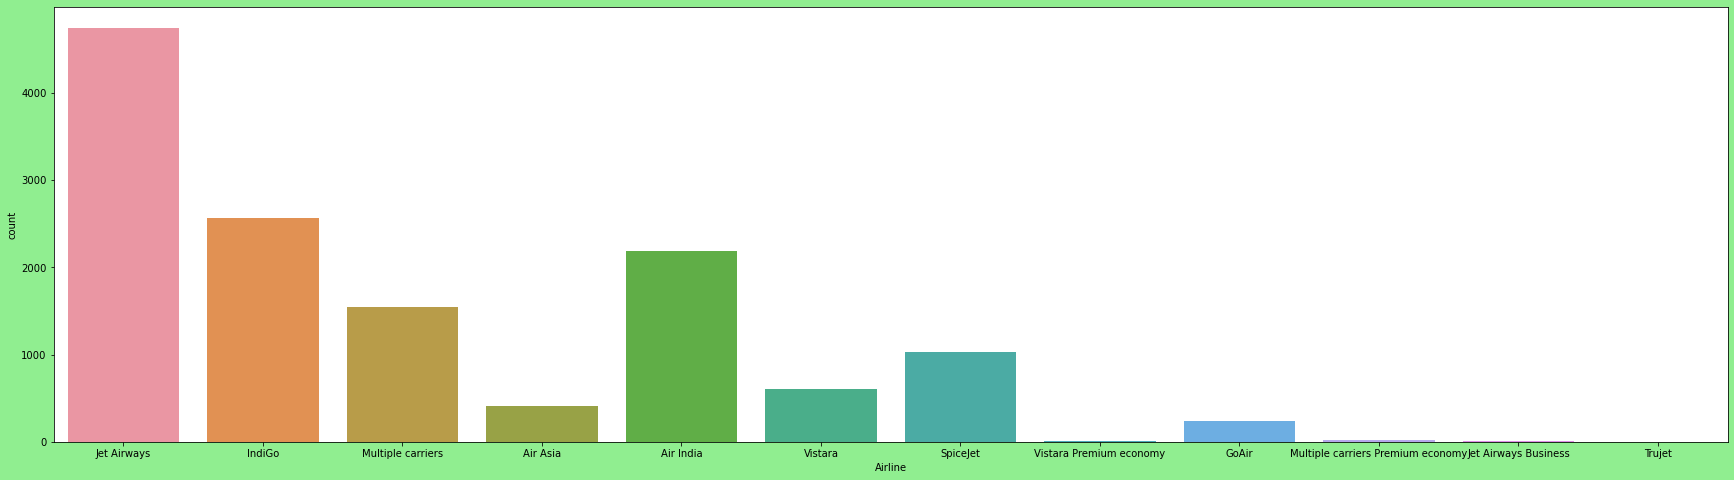

In [274]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.countplot(x='Airline', data=df)

In [275]:
##jet airways are more in no.as compared to other flights....other flights which are more frequent other than jet airways are 
#Indigo  and Air india.....

<AxesSubplot:xlabel='Airline', ylabel='Price'>

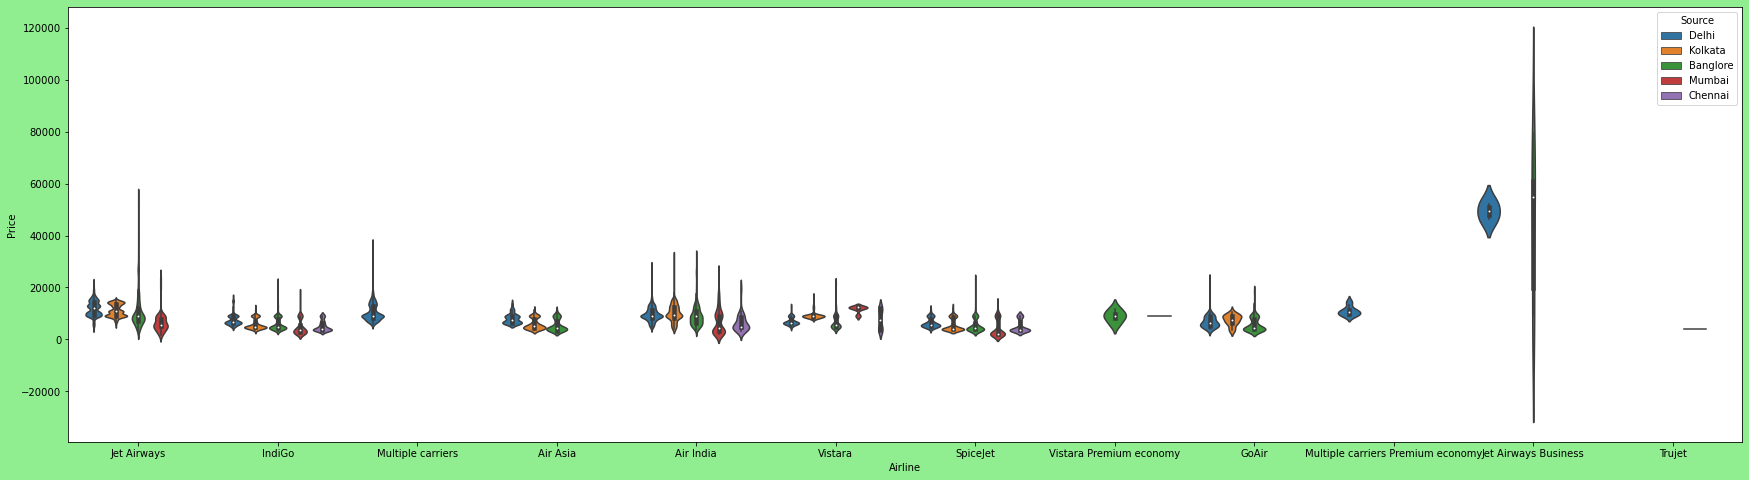

In [276]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.violinplot(x='Airline', y='Price', data=df,hue='Source')

In [ ]:
#Air india ,Jet airways,spice jet,indigo,vistara MAINLY strts from delhi,kolkata,banglore,mumbai,chennai
#carrier flights only originate from delhi


<AxesSubplot:xlabel='Airline', ylabel='Price'>

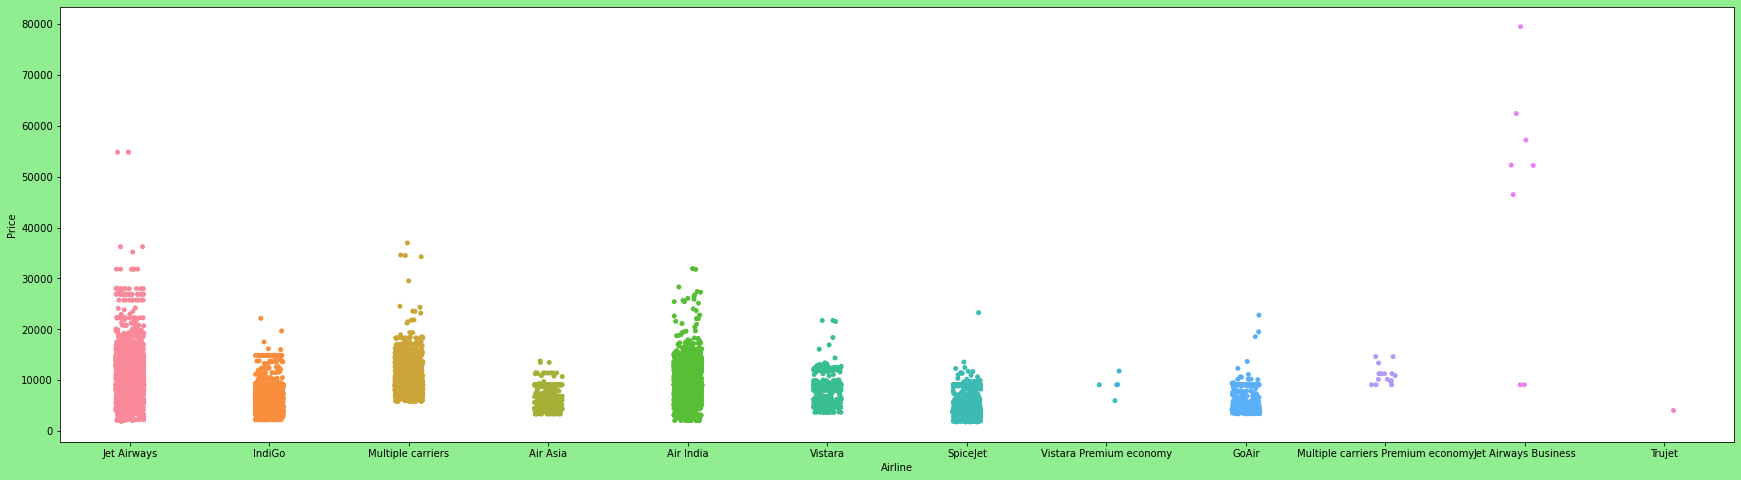

In [85]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.stripplot(x='Airline', y='Price', data=df)

In [ ]:
#jet airways have price between 3000 to 20,000 mostly except some exceptional cases
#air india also has price varying between 3000 to 20,000

<AxesSubplot:xlabel='Airline', ylabel='Price'>

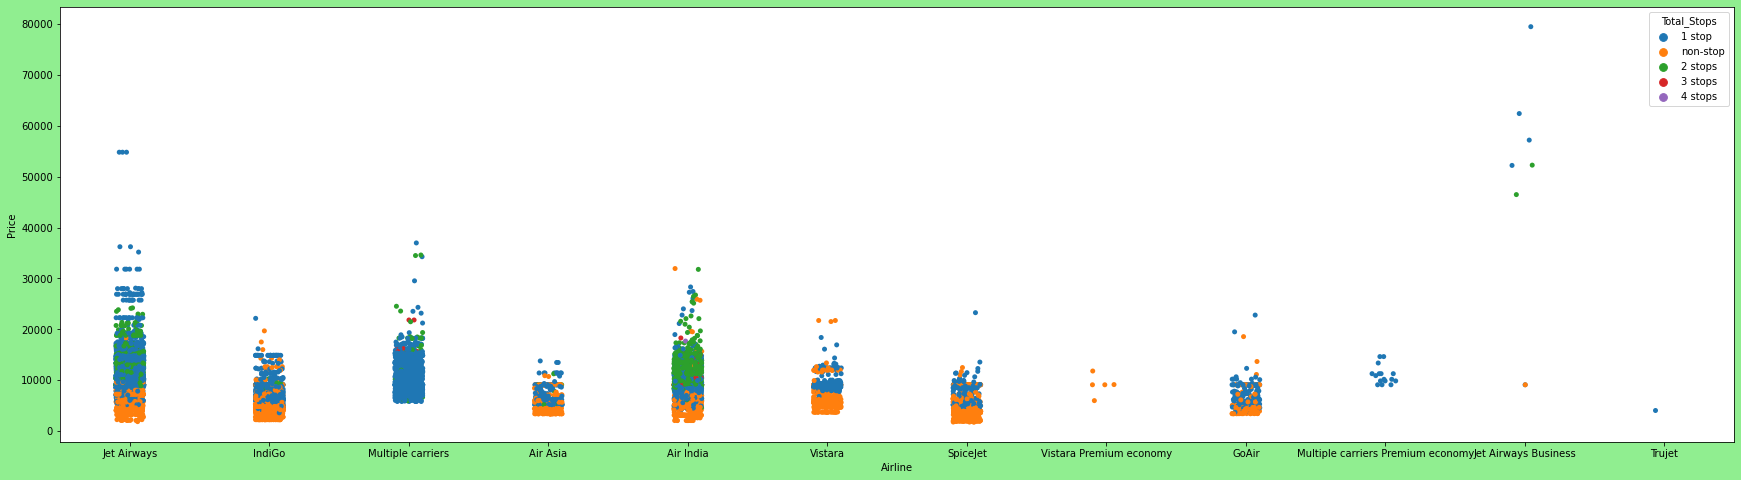

In [86]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.stripplot(x='Airline', y='Price',hue='Total_Stops' ,data=df)

In [ ]:
#most jet airways flights have mostly one stops ...
#air india has mostly two stops..
#multiple carriers flight have only one stop...
# some flights of jet airways , indigo,,spicejet,vistara,air india are non stops .....
#very few flights have 3 stops ....
#mostly no flights have 4 stops

<AxesSubplot:xlabel='Airline', ylabel='Price'>

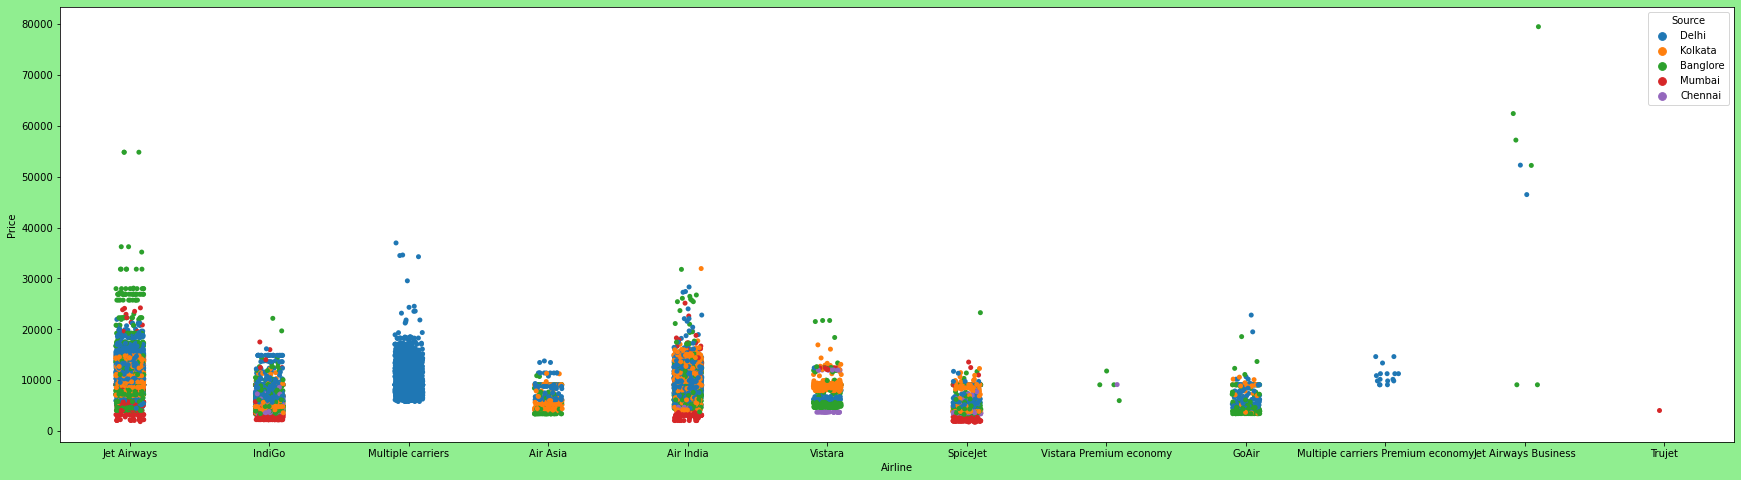

In [277]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.stripplot(x='Airline', y='Price',hue='Source' ,data=df)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

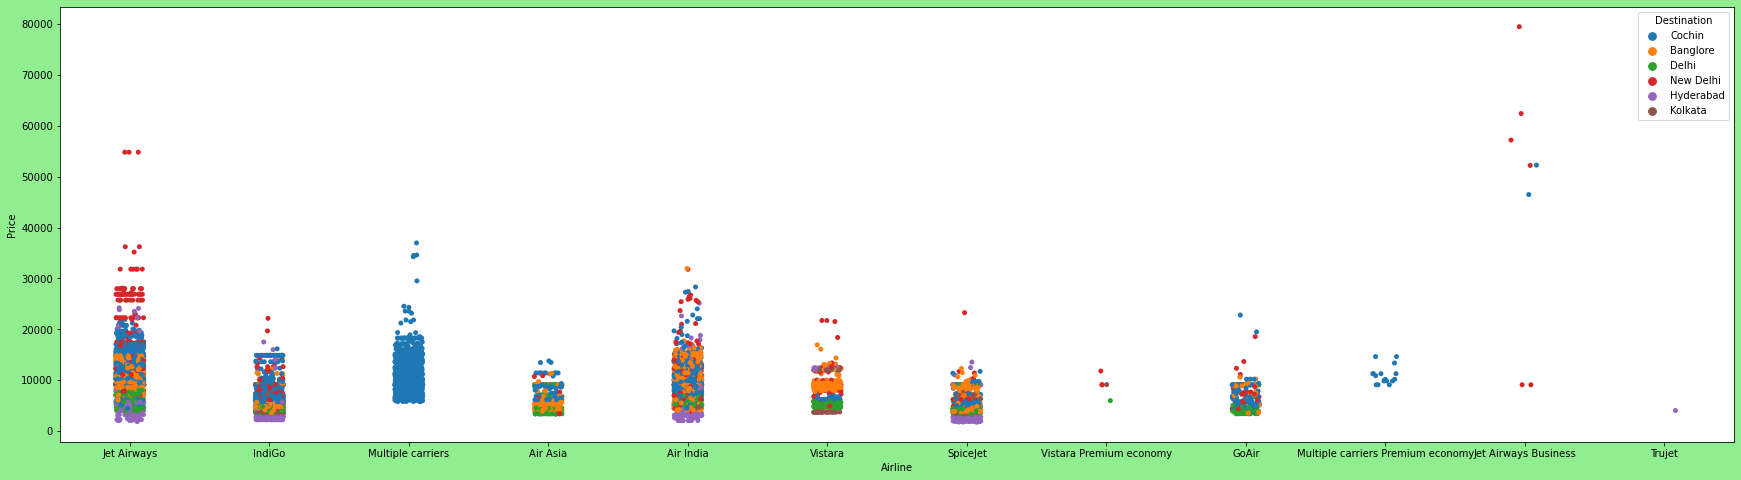

In [88]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.stripplot(x='Airline', y='Price',hue='Destination',data=df)

In [ ]:
#many flights have destination hyderabad and new delhi ,cochin,banglore....
##jet airways & air india flights have all major cities as destiation i.e. cochin,banglore,delhi,new delhi,hyderabad,kolkata
#multiple carriers flights only go to cochin

In [89]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [90]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,9087.064121,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,9087.064121,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,9087.064121,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,9087.064121,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,9087.064121,24,6


In [91]:
# So,as we have converted Date_of_Journey column into integers, Now we can drop this column.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [92]:
# Departure time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time,
df.drop(["Dep_Time"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,9087.064121,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,9087.064121,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,9087.064121,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,9087.064121,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,9087.064121,24,6,23,55


In [93]:
# Arrival time 

df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time ,
df.drop(["Arrival_Time"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,9087.064121,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,9087.064121,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,9087.064121,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,9087.064121,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,9087.064121,24,6,23,55,2,45


In [94]:
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [95]:
# Adding duration_hours and duration_mins list to df dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,9087.064121,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,9087.064121,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,9087.064121,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,9087.064121,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,9087.064121,24,6,23,55,2,45,2,50


In [96]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4.0,2.0,1.0,108.0,0.0,8.0,9087.064121,6,6,17,30,4,25,10,55
1,3.0,3.0,0.0,94.0,0.0,8.0,9087.064121,12,5,6,20,10,20,4,0
2,4.0,2.0,1.0,108.0,0.0,5.0,9087.064121,21,5,19,15,19,0,23,45
3,6.0,2.0,1.0,108.0,0.0,8.0,9087.064121,21,5,8,0,21,0,13,0
4,0.0,0.0,2.0,18.0,4.0,8.0,9087.064121,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,67.0,4.0,8.0,4107.000000,9,4,19,55,22,25,2,30
10679,1.0,3.0,0.0,67.0,4.0,8.0,4145.000000,27,4,20,45,23,20,2,35
10680,4.0,0.0,2.0,18.0,4.0,8.0,7229.000000,27,4,8,20,11,20,3,0
10681,10.0,0.0,5.0,18.0,4.0,8.0,12648.000000,1,3,11,30,14,10,2,40


In [107]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4.0,2.0,1.0,108.0,0.0,8.0,9087.064121,6,6,17,30,4,25,10,55
1,3.0,3.0,0.0,94.0,0.0,8.0,9087.064121,12,5,6,20,10,20,4,0
2,4.0,2.0,1.0,108.0,0.0,5.0,9087.064121,21,5,19,15,19,0,23,45
3,6.0,2.0,1.0,108.0,0.0,8.0,9087.064121,21,5,8,0,21,0,13,0
4,0.0,0.0,2.0,18.0,4.0,8.0,9087.064121,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,67.0,4.0,8.0,4107.000000,9,4,19,55,22,25,2,30
10679,1.0,3.0,0.0,67.0,4.0,8.0,4145.000000,27,4,20,45,23,20,2,35
10680,4.0,0.0,2.0,18.0,4.0,8.0,7229.000000,27,4,8,20,11,20,3,0
10681,10.0,0.0,5.0,18.0,4.0,8.0,12648.000000,1,3,11,30,14,10,2,40


In [108]:
df.skew()

Airline            0.720924
Source            -0.424151
Destination        1.247893
Route             -0.521448
Total_Stops        0.639737
Additional_Info   -1.784752
Price              2.026457
Journey_day        0.135142
Journey_month     -0.390684
Dep_hour           0.109087
Dep_min            0.159397
Arrival_hour      -0.384591
Arrival_min        0.111711
Duration_hours     0.857425
Duration_mins     -0.093531
dtype: float64

In [112]:
y = df['Price']
X = df.drop(columns=['Price'])

In [109]:
np.abs(3)

3

In [110]:
np.abs(-3)

3

In [113]:
from scipy.stats import zscore
(np.abs(zscore(X))<3).all()

Airline             True
Source              True
Destination         True
Route               True
Total_Stops         True
Additional_Info    False
Journey_day         True
Journey_month       True
Dep_hour            True
Dep_min             True
Arrival_hour        True
Arrival_min         True
Duration_hours     False
Duration_mins       True
dtype: bool

In [114]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [115]:
X_scaled.shape[1]

14

In [116]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.053715,Airline
1,1.629738,Source
2,2.007249,Destination
3,1.704629,Route
4,1.933686,Total_Stops
5,1.077257,Additional_Info
6,1.021331,Journey_day
7,1.225953,Journey_month
8,1.034613,Dep_hour
9,1.037254,Dep_min


In [125]:
rf = RandomForestRegressor()
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    rf.fit(X_train,y_train)
    pred_train = rf.predict(X_train)
    pred_test= rf.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:-0.9442192352365092
At random state0,the testing accuracy is:-0.6711338058200441


At random state1,the training accuracy is:-0.9476505194857636
At random state1,the testing accuracy is:-0.6553872065978639


At random state2,the training accuracy is:-0.9431968178643659
At random state2,the testing accuracy is:-0.671221048329117


At random state3,the training accuracy is:-0.9429706535558808
At random state3,the testing accuracy is:-0.6478461210749897


At random state4,the training accuracy is:-0.9398070043703647
At random state4,the testing accuracy is:-0.7138409573594398


At random state5,the training accuracy is:-0.9467168329882082
At random state5,the testing accuracy is:-0.645831736138196


At random state6,the training accuracy is:-0.948229483598118
At random state6,the testing accuracy is:-0.6188904381199782


At random state7,the training accuracy is:-0.9415611871037646
At random state7,the testing accuracy is:-0.7002204614275486


At 

In [229]:
#so as we can interpret random state 87 is giving best train and test accuracy,so we train our model at random state 87:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=87)

In [230]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

R2 score: 70.97525587116648
cross val score: 62.52379372247978


In [231]:
y_pred=rf.predict(X_test)
y_train.head()

9312    13941.0
6274    10262.0
2124    10031.0
3919     7826.0
1025    10231.0
Name: Price, dtype: float64

In [232]:
#Adjusted R2 score
rf.score(X_train,y_train)

0.9437583643841071

In [233]:
rf.score(X_test,y_test)

0.7097525587116648

In [234]:
#lets plot and visualize
y_pred=regression.predict(X_test)
y_pred

array([-14844.35479649,  -4928.93616321, -17885.5916478 , ...,
       -14967.78411942, -14600.67766713,  -6107.77604269])

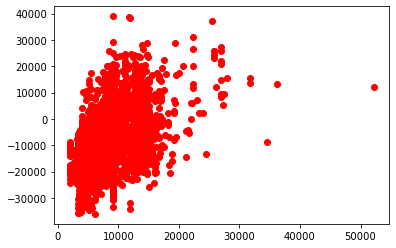

In [237]:
plt.scatter(y_test,y_pred,color='r')
plt.xlabel='actual PRICE'
plt.ylabel='Predicted PRICE'
plt.title='Actual vs model predicted '
plt.show()

In [238]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 18213.69501318144
MSE: 411812574.2934039
RMSE: 20293.165704083825


In [239]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dtr=r2_score(y_test,y_pred)
print('R2 score:',dtr*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtr=dtscore.mean()
print('cross val score:',dtr*100)

R2 score: 52.367033108997596
cross val score: 48.48889889770486


In [240]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1665.0337981039168
MSE: 8376651.603740574
RMSE: 2894.2445652951606


In [241]:
from sklearn.ensemble import ExtraTreesRegressor

In [242]:
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
model.score(X_train,y_train)
y_pred=model.predict(X_test)
modelr=r2_score(y_test,y_pred)
print('R2 score:',modelr*100)
modelscore=cross_val_score(model,X,y,cv=5)
modelr=modelscore.mean()
print('cross val score:',modelr*100)

R2 score: 66.50074837519495
cross val score: 62.167763790528916


In [243]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1514.8006257182076
MSE: 5891120.7544377865
RMSE: 2427.1631083299258


In [192]:
import xgboost as xgb
from xgboost import XGBRegressor
xg=XGBRegressor()

xg.fit(X_train,y_train)
xg.score(X_train,y_train)
y_pred=xg.predict(X_test)
xg_score=r2_score(y_test,y_pred)
print('R2 score:',xg_score*100)
xgscore=cross_val_score(xg,X,y,cv=5)
xgr=dtscore.mean()
print('cross val score:',xgr*100)

R2 score: 72.52213375797251
cross val score: 48.88854417722428


In [244]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1514.8006257182076
MSE: 5891120.7544377865
RMSE: 2427.1631083299258


In [247]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
ada.score(X_train,y_train)
y_pred=ada.predict(X_test)
ada_score=r2_score(y_test,y_pred)
print('R2 score:',ada_score*100)

adascore=cross_val_score(ada,X,y,cv=5)
adab=adascore.mean()
print('cross val score:',adab*100)

R2 score: 31.846903706892547
cross val score: 32.609609287499545


In [248]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 2872.0202568254826
MSE: 11985286.254998805
RMSE: 3461.977217573623


In [253]:
#as observed the random forest regressor works well with this dataset...so we hypertune parameters of final model RandomForestRegressor using gridsearchCV

parameters ={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'min_samples_split':[2], 
             'min_samples_leaf':[1], 'bootstrap':[True]}

In [254]:
rf=RandomForestRegressor()
gcv=GridSearchCV(rf,parameters)
gcv.fit(X_train,y_train)
print(gcv.best_params_)

{'bootstrap': True, 'criterion': 'mse', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [255]:
rf=RandomForestRegressor(criterion='mse',max_features='log2', 
             min_samples_leaf=2, bootstrap=True)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)
rfscore=cross_val_score(rf,X,y,cv=5)
rfr=rfscore.mean()
print('cross val score:',rfr*100)

R2 score: 71.27446190205768
cross val score: 62.485893003811285


In [259]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1541.4725361417416
MSE: 5051623.706897248
RMSE: 2247.5817464326515


In [ ]:
#the best model is RandomForestRegressor with 71% accuracy and 62% cross validation score & 
#MAE: 1541.4725361417416
#MSE: 5051623.706897248
#RMSE: 2247.5817464326515

In [261]:
#saving the model to local file system
filename='flight price prediction_model.pickle'
pickle.dump(rf,open(filename,'wb'))